<a href="https://colab.research.google.com/github/gabrielrodri33/DataBaseFiap/blob/main/Aula_01_Modelo_Notebook_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas e/ou módulos (packages ou pacotes) necessários.

In [2]:
# Importar as bibliotecas necessárias
import pandas as pd
# https://pandas.pydata.org/

# Conversão de dados categóricos em numéricos
from sklearn.preprocessing import LabelEncoder
# https://scikit-learn.org/stable/modules/preprocessing.html

# Algoritmos de classificação
# KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Seleção de dados de treino e teste
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Obtenção da acurácia do modelo
from sklearn.metrics import accuracy_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Importação dos dados

https://www.kaggle.com/datasets/shivam2503/diamonds

In [31]:
# Criar um Pandas Data Frame a partir do arquivo de dados csv
dados = pd.read_csv("./dados/diamonds.csv")
dados

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


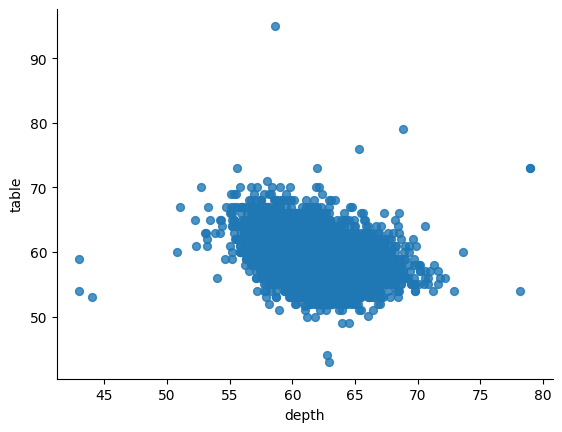

In [68]:
# @title depth vs table

from matplotlib import pyplot as plt
dados.plot(kind='scatter', x='depth', y='table', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Análise Exploratória

In [33]:
# Quantos registros (linhas) e quantos atributos (colunas) tem o Data Frame?
dados.shape
print(f'Linhas: {dados.shape[0]}\nColunas: {dados.shape[1]}')

Linhas: 53940
Colunas: 11


In [38]:
# Visualizar as primeiras linhas
dados.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
# Visualizar as últimas linhas
dados.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [41]:
# Nomes das colunas
dados.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [42]:
# Informações do formato de dados das colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [43]:
# Estatísticas descritivas das colunas numéricas
dados.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [46]:
# Estatísticas descritivas das colunas não numéricas
dados.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [49]:
# Seleção dos dados de uma coluna (formato Series)
preco_series = dados['price']
preco_series

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [50]:
type(preco_series)

pandas.core.series.Series

In [53]:
# Seleção dos dados de uma coluna (formato Data Frame)
preco_df = dados[['price']]
preco_df

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [63]:
# Cálculo de média aritmética dos valores de uma coluna
media_aritm = dados['price'].mean().round(2)
media_aritm

3932.8

In [64]:
# Cálculo de mediana dos valores de uma coluna
mediana = dados['price'].median().round(2)
mediana

2401.0

In [66]:
# Cálculo do desvio padrão dos valores de uma coluna
desvio_padrao = dados['price'].std().round(2)
desvio_padrao

3989.44

Pré Processamento

In [70]:
# Exclusão de uma coluna usando o método .drop
# axis = 0 ----> linha
# axis = 1 ----> coluna
dados = dados.drop('Unnamed: 0', axis=1)
dados

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [72]:
# Conversão dos dados de uma coluna em um Array Numpy (Vetor)
vetor_numpy = dados['price'].values
vetor_numpy

array([ 326,  326,  327, ..., 2757, 2757, 2757])

In [75]:
# Conversão de uma coluna de valores categóricos para numéricos
# Label Encoding
le = LabelEncoder()

In [81]:
dados['cut'].values

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

In [84]:
# Separação dos dados de entrada e dados de saída
dados['cut'] = le.fit_transform(dados['cut'])
dados['cut'].values

array([2, 3, 1, ..., 4, 3, 2])

In [ ]:
# Separação em dados de treino e dados de teste


In [ ]:
# Tamanho do conjunto de treino


In [ ]:
# Tamanho do conjunto de teste


Escolha do algoritmo

In [ ]:
# Instanciar o modelo


In [ ]:
# Treinar o modelo


Avaliar o modelo com base na acurácia

In [ ]:
#

EXERCÍCIO: Treine um outro modelo usando o algoritmo Decision Tree e compare as métricas